# Calculating EA Sports FC 24 Player Ratings based on their Stats :

Ever since I was a kid, I have always played the FIFA games on my computer or PS4. In the FIFA games, each player has an "Overall Rating": it is a number that represents how "good" he is in the game. Each player also has many other ratings that give us an idea of the strengths of a certain player.
But how are those Overall "Ratings" calculated ? That was always an intereting question for me.  
In this project, the aim is to see if we can predict accurately player's overall ratings. We will use different methods :

- **First method**: the "Overall Rating" will be calculated as a linear combination of all his ratings
- **Second method**: we will try to predict a player's "Overall Rating" with IRL statistics of the players for the previous season (not sure if this is possible, but we will give it a go !)

# Part 1: Linear Regression with the sub-ratings
  
In the first part of this project, we will first load our dataset and then work with our data using a linear classifier.

## Loading and preprocessing the data:

First we load the data, which is a dataset that I have already downloaded (from Kaggle).

In [18]:
import pandas as pd

file_path="./datasets/archive/male_players.csv"

ea_stats = pd.read_csv(file_path)

ea_stats.head(10)

,Unnamed: 0,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
0,0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,...,77,64,High,Low,Right,4,5,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
1,1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,...,93,87,High,Medium,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
2,2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,...,74,75,High,Medium,Right,5,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
3,3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,...,68,44,Low,Low,Left,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
4,4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,...,82,63,Medium,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
5,5,Thibaut Courtois,Belgium,Real Madrid,GK,31,90,85,89,76,...,70,23,Medium,Medium,Left,3,1,https://www.ea.com/games/ea-sports-fc/ratings/...,M,93.0
6,6,Harry Kane,England,FC Bayern München,ST,30,90,69,93,84,...,84,80,High,High,Right,5,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
7,7,Robert Lewandowski,Poland,FC Barcelona,ST,35,90,75,91,80,...,89,81,High,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
8,8,Mohamed Salah,Egypt,Liverpool,RW,31,89,89,87,81,...,75,63,High,Medium,Left,3,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
9,9,Rúben Dias,Portugal,Manchester City,CB,26,89,62,39,66,...,90,93,Medium,High,Right,4,2,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN


Let's take a look at our data: we can plot some histograms to get an idea of the distribution for each rating.

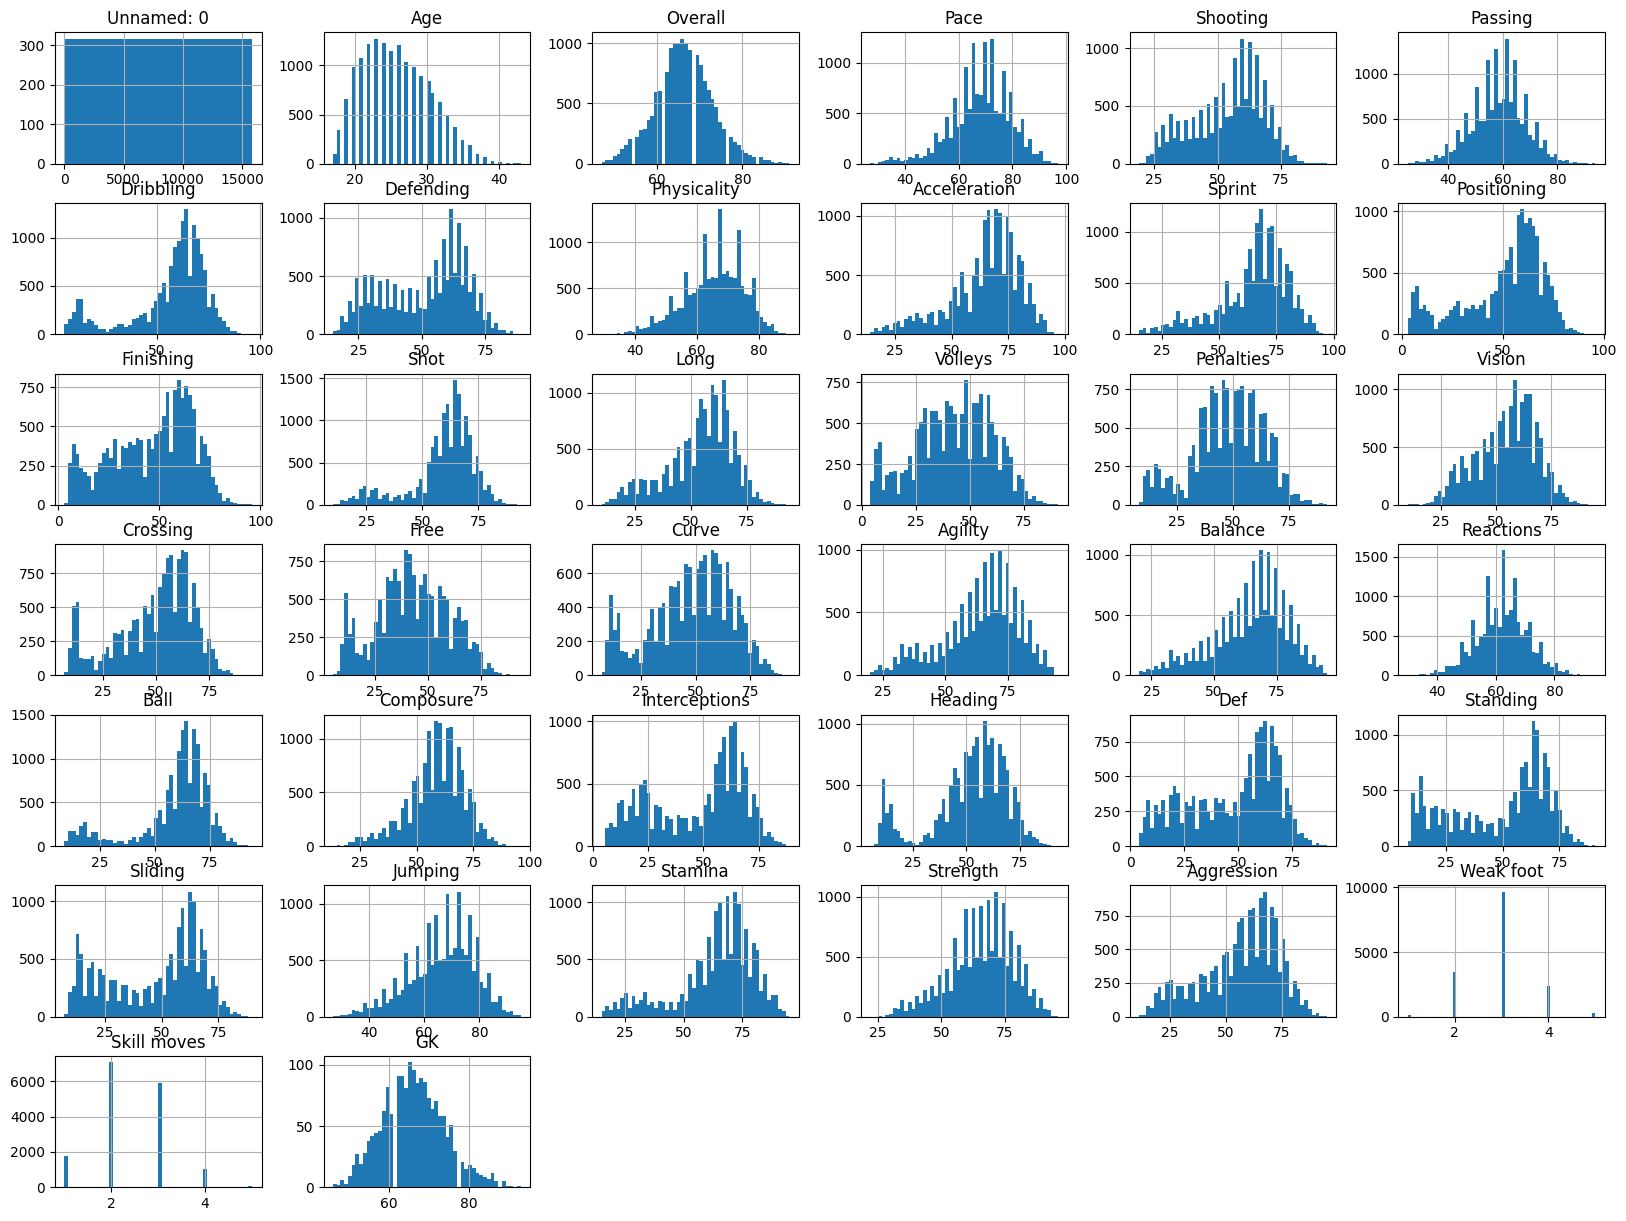

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
ea_stats.hist(bins=50, figsize=(20,15))
plt.show()

That looks very messy... Let's clean our dataset to have a clearer place to work!  
We will drop certain columns (or features) that don't give us useful information for the "Overall Rating" of a player, like the "Preferred Foot" or "Gender" (because all players all male)... We also want to get rid of all goalkeepers, because it is a special position to play and less statistics will be available for the next part of the project :)

In [21]:
dropped_columns = ["Name","Nation","Club","Preferred foot","URL","GK","Gender","Att work rate","Def work rate","Unnamed: 0"]

X = ea_stats.drop(dropped_columns,axis=1)
X = X[ea_stats["Position"] != "GK"].reset_index(drop=True)
y = X["Overall"]
X.dropna(axis=0)
kept_columns = X.columns
X.head(10)

,Position,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,...,Heading,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
0,ST,24,91,97,90,80,93,36,78,97,...,73,26,34,32,88,88,77,64,4,5
1,ST,23,91,89,93,66,79,45,88,82,...,83,38,47,29,93,76,93,87,3,3
2,CM,32,91,72,88,94,86,65,78,72,...,55,66,70,53,72,88,74,75,5,4
3,CF,36,90,80,87,90,96,33,64,87,...,60,20,35,24,71,70,68,44,4,4
4,CF,35,90,79,88,83,87,39,78,78,...,90,43,24,18,85,82,82,63,4,4
5,ST,30,90,69,93,84,82,49,83,67,...,89,46,46,38,87,83,84,80,5,3
6,ST,35,90,75,91,80,86,44,84,76,...,91,35,42,19,92,76,89,81,4,4
7,RW,31,89,89,87,81,88,45,76,89,...,59,38,43,41,80,87,75,63,3,4
8,CB,26,89,62,39,66,64,89,87,54,...,87,91,91,87,84,78,90,93,4,2
9,LW,23,89,95,82,78,92,29,68,95,...,50,32,25,18,74,84,64,58,4,5


Let's also take a look at the "Overall Rating" vector y, to check if we have what we wanted:

In [23]:
y.head(10)

0    91
1    91
2    91
3    90
4    90
5    90
6    90
7    89
8    89
9    89
Name: Overall, dtype: int64

# Create our Linear Model and make Predictions:

As we already said in the beginning, we want to compute the "Overall Rating" with the other sub-ratings. In theory, this model should be doing a good job (how else are they supposed to get the "Overall Rating" ??). Let's first build a small and very basic pipeline to "code" the position feature to a number, as models usually don't like non-numerical values.

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

col_to_enc = ["Position"]

pipeline = Pipeline(steps=[
    ("encoder", OrdinalEncoder(dtype="int64"))
])

col_encd = pipeline.fit_transform(X[["Position"]])
X.Position = col_encd
X.head()

,Position,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,...,Heading,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
0,13,24,91,97,90,80,93,36,78,97,...,73,26,34,32,88,88,77,64,4,5
1,13,23,91,89,93,66,79,45,88,82,...,83,38,47,29,93,76,93,87,3,3
2,4,32,91,72,88,94,86,65,78,72,...,55,66,70,53,72,88,74,75,5,4
3,3,36,90,80,87,90,96,33,64,87,...,60,20,35,24,71,70,68,44,4,4
4,3,35,90,79,88,83,87,39,78,78,...,90,43,24,18,85,82,82,63,4,4


Now that's better ! Let's now create sets for training and for testing :

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train.head()

,Position,Age,Overall,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Acceleration,...,Heading,Def,Standing,Sliding,Jumping,Stamina,Strength,Aggression,Weak foot,Skill moves
10979,13,31,62,80,62,45,59,21,61,77,...,60,25,12,17,76,64,69,35,3,2
9518,2,29,64,68,41,56,60,60,68,67,...,50,61,61,59,64,71,69,63,3,2
2916,13,34,72,65,72,68,69,44,71,63,...,69,45,38,26,76,68,76,61,4,3
9161,1,29,64,53,32,46,39,63,73,52,...,63,63,63,61,74,67,82,56,2,2
9314,0,30,64,62,62,65,64,47,65,64,...,44,39,52,48,55,71,64,60,3,3


Now it's time to create our model ! We will use the **LinearRegression** model from sklearn, one of the most simple model.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def linear_regression_mae(X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(predictions, y_test)
    return(mae,predictions)

Now we can make some predictions :

In [30]:
mae ,predictions =linear_regression_mae(X_train, y_train, X_test, y_test)

print(mae)

3.537805420831139e-14


The Mean Absolute Error (MAE) is very small, which means our models is doing some good predictions. And because the MAE is so low, we can thnik that the "Overall Rating" is indeed linearly computed from the other ratings.

We can also compare the real ratings with the predicted ratings to show how close we are :

In [31]:
y_test_head = list(y_test)[:20]

print(y_test_head)

[61, 68, 66, 86, 69, 58, 72, 59, 78, 65, 69, 55, 75, 50, 59, 75, 59, 51, 68, 54]


In [32]:
predictions = [int(item) for item in predictions]
pred_list_head = predictions[:20]

print(pred_list_head)

[60, 67, 65, 85, 68, 57, 71, 58, 77, 64, 68, 54, 75, 49, 58, 74, 58, 50, 67, 53]


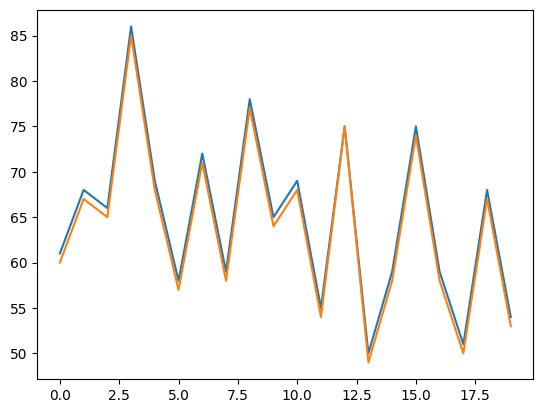

In [33]:
abs = range(1,21)

plt.plot(y_test_head)
plt.plot(pred_list_head)
plt.show()

We can see that for high ratings (above 80) and low ratings (below 60) the model is giving quite accurate results, usually one point off maximum.

Now we can try something else, which is already a bit more fun. A FIFA player card usually looks like this:

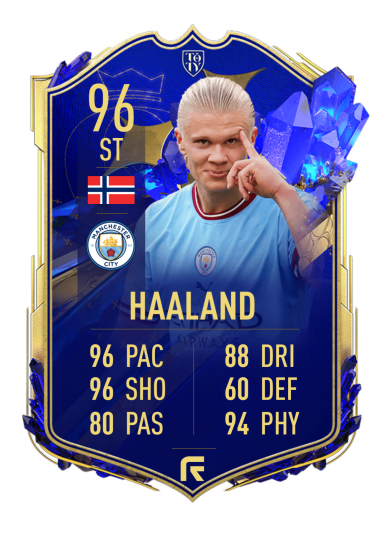

We can see the "Overall Rating" of the player, which is 96; but we also see 6 other ratings a the bottom of the card (Pace, Shooting, Passing, Dribbling, Defending and Physicality). Those ratings are already calculated from other sub-ratings we have work with previously, so calculating those 6 ratings separatly should be quite easy.    

  
Now my question is : can we have an accurate prediction of the "Overall Rating" using only those 6 ratings as training data ? Let's find out !

First we get rid of all the other columns :

In [35]:
kept_columns_2 = ["Pace","Shooting","Passing","Dribbling","Defending","Physicality"]

X_2 = X[kept_columns_2]

X_2.head()

,Pace,Shooting,Passing,Dribbling,Defending,Physicality
0,97,90,80,93,36,78
1,89,93,66,79,45,88
2,72,88,94,86,65,78
3,80,87,90,96,33,64
4,79,88,83,87,39,78


Like previously, we create the sets for training and testing: 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2,random_state=0)

In [38]:
mae_2,predictions_2 =linear_regression_mae(X_train, y_train, X_test, y_test)

print(mae_2)

2.8887184357258002


**Comments**: the MAE is higher, which shows us it is harder to make a prediction with only 6 ratings than with all the ratings.

Again, we can visualise the predictions and the real "Overall Ratings" on a graph :

In [39]:
print(list(y_test)[:20])
predictions_2 = [int(item) for item in predictions_2]
print(predictions_2[:20])

[61, 68, 66, 86, 69, 58, 72, 59, 78, 65, 69, 55, 75, 50, 59, 75, 59, 51, 68, 54]
[60, 67, 65, 74, 66, 67, 74, 62, 73, 63, 67, 55, 71, 57, 61, 75, 61, 53, 66, 59]


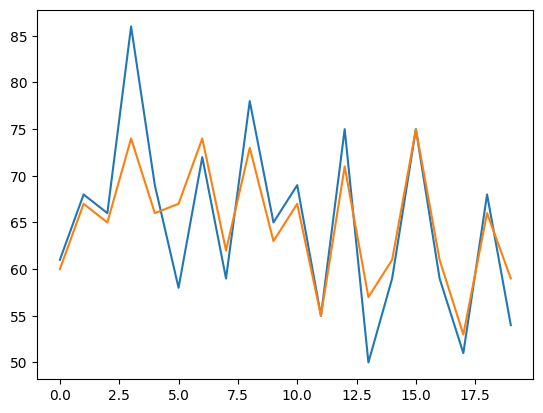

In [40]:
plt.plot(list(y_test)[:20])
plt.plot(predictions_2[:20])
plt.show()

Less precise than the previous the previous case...

# Part 2: Using the IRL Statistics of the players

In this second part we will try (maybe with success !) to predict the "Overall Rating" of players with their statistics from the previous season.

(to be continued...)